In [ ]:
pip install tensorflow

In [ ]:
# Installation des packages
from sklearn import datasets
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Telecharger la bd
df=datasets.load_breast_cancer()

***Decouvrir la bd***

In [ ]:
print(df.DESCR)

In [ ]:
df.target

In [ ]:
df.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

***Preparer les donnees***

In [ ]:
X=df.data
y=df.target

In [ ]:
# Standardiser nos donnees
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
# Separer les donnees d'entrainement(se sont les donnees qu'on va injecter a notre reseau de neurone) et les 
# donnees de test(Nous les utiliserons pour voir la precision de notre reseau de neurone)

X_train,X_test,y_train,y_test=train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape,X_test.shape)

(455, 30) (114, 30)


***La construction de notre reseau de neurone***

In [ ]:
# 1- specifier les entrees
# Creation du reseau de neurone
model=tf.keras.models.Sequential()

In [ ]:
# Ajouter la premiere couche cachee
model.add(tf.keras.layers.Dense(units=15,activation='relu',kernel_initializer='uniform',input_dim=30))

- Ici, **unit=15** represente le nombre de noeuds (dans notre cas nous prennons 15, c'est une aptitude qui se developpe par experience mais ca vient surtout du fait que nous avons 30 variables numerique dans notre bd)

- Concernant la fonction d'activation, nous allons utiliser pour les coucles cachees la fonction ReLu (demontrer par experience, meilleur pour les couches cachees): **activation='relu'** et la fonction Sigmoid pour la sortie (demontrer par experience, meilleur pour les couches sorties)
- **kernel_initializer='uniform'** permet d'initier les poids

- **input_dim=30**: ici on definit la couche d'entree directement vu que nous nous trouvons sur la premiere couche cachee.



*   Élément de liste

*   Élément de liste
*   Élément de liste


*   Élément de liste


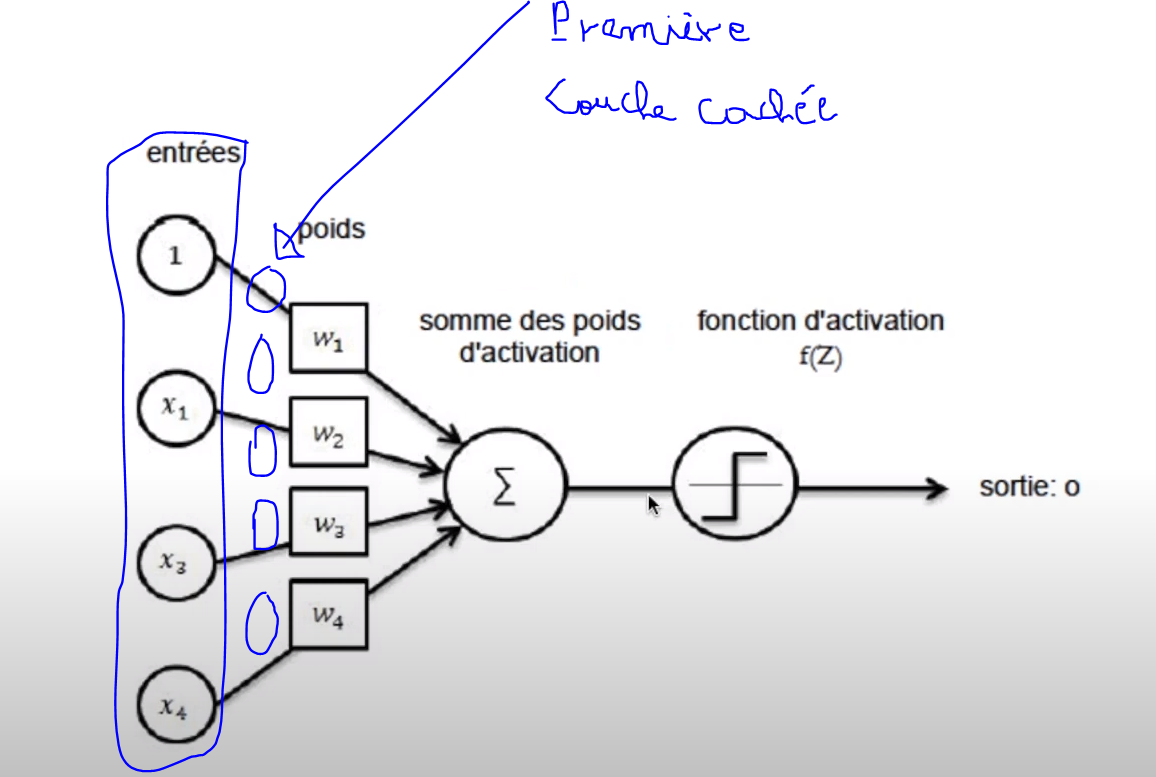

Nous pouvons ajouter d'autres couches cachees, mais nous nalons pas le faire maintenant mais si apres avoir executer notre sortie on a besoin de plus de precision nous allons ajouter d'autres couches cachees

In [ ]:
# Ajouter la couche de sortie
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [ ]:
# Ajout de la fonction cout
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])


**La fonction cout**: elle permettra de comparer la valeur predite a la valeur relle. Elle permet egalement de mettre a jour les **poids**

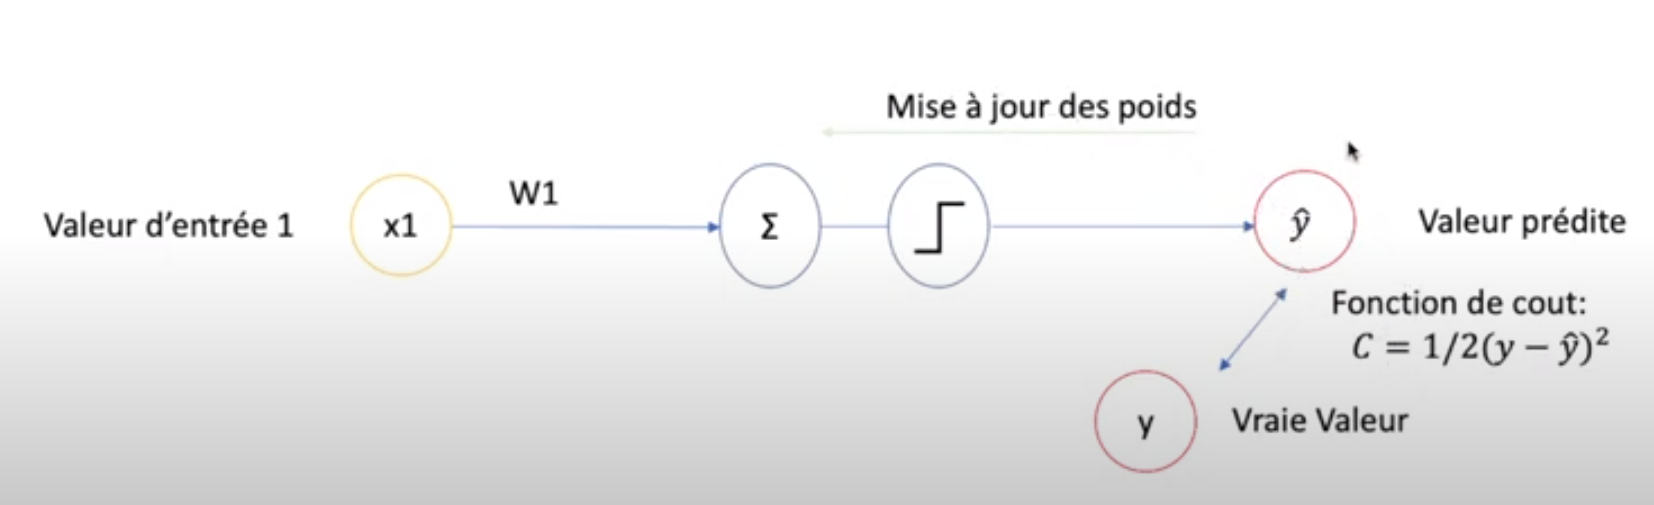

In [ ]:
# la synthese de ce qu'on a construit
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                465       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


**Maintenant on doit entrainer notre model**

In [ ]:
model.fit(X_train,y_train,epochs=100) #batch_size=10: on peut le mettre ou pas,si on ne le met pas tous les donnees de la bd seront entrainees(cela prend bcp de temps)

Epoch 1/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0140 - binary_accuracy: 0.9934
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0138 - binary_accuracy: 0.9912
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0138 - binary_accuracy: 0.9912
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0136 - binary_accuracy: 0.9912
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0136 - binary_accuracy: 0.9934
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0136 - binary_accuracy: 0.9934
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0134 - binary_accuracy: 0.9934
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0135 - binary_accuracy: 0.9934
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0133 - binary_accuracy: 0.9934
Epoch 10/100
15/15 [==========================

In [ ]:
# Tester notre model
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print(f'Test accuracy {test_accuracy} et Test Loss {test_loss}')

4/4 [==============================] - 0s 3ms/step - loss: 0.0662 - binary_accuracy: 0.9825
Test accuracy 0.9824561476707458 et Test Loss 0.06616689264774323
